<a href="https://colab.research.google.com/github/KDOXG/Inteligencia-Artificial/blob/master/pytorch_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![img](https://miro.medium.com/max/1281/1*uZOUyLevwJkJGF-h_tFhmQ.png)

# **Deep Learning com PyTorch**


> # **http://bit.ly/pytorchtutorial**

<br><br>
* Alexandre Thurow Bender - atbender@inf.ufpel.edu.br 
<br>
* Victor Cosenza Vieira da Silva - vcvdsilva@inf.ufpel.edu.br
<br><br>


# **Recursos**


* [Slides Deep Learning](https://docs.google.com/presentation/d/13f_7vNR48WdyN4Uk2CTsZs4dMOwVfylq0Lb01_A1eio/edit?usp=sharing) <br>

* [MNIST Multilayer Perceptron](https://colab.research.google.com/drive/1XBPZiZ4g7bokuvyitkxeYgo620ykmEW8) <br>

* [CIFAR10 Multilayer Perceptron](https://colab.research.google.com/drive/14_KmzQFCZuVd1eDNewfeyMVDYMVIJspf) <br>


* [MNIST Convolutional Neural Network](https://colab.research.google.com/drive/1GshfQx_4Az5lAsAQTY2JzvUZEcl242DP) <br>

* [CIFAR10 Convolutional Neural Network](https://colab.research.google.com/drive/1UogTp71FiBkyDAXzXc2snq8ItTRvSyJm) <br>

* [PyTorch Documentation](https://pytorch.org/docs/stable/index.html)

<br><br>

---
# **What is PyTorch?**


PyTorch is an open-source machine learning library for Python which allows maximum flexibility and speed on scientific computing for deep learning. It is a replacement for NumPy to use the power of GPUs.

In [0]:
# importing PyTorch
import torch


---
# **Tensors in PyTorch**



A tensor is an n-dimensional data container which is similar to NumPy’s ndarray. For example:

* 1d-tensor is a vector;
* 2d-tensor is a matrix;
* 3d-tensor is a cube;
* 4d-tensor is a vector of cubes.

Let’s take a look at some examples of how to create a tensor in PyTorch. To Initialize a tensor, we can either assign values directly or set the size of the tensor. `torch.Tensor(n,m)` will initialize a tensor with size n x m.

In [0]:
# create a tensor
new_tensor = torch.Tensor([[1, 2], [3, 4]])

# create a 2 x 3 tensor with random values
empty_tensor = torch.Tensor(2, 3)

# create a 2 x 3 tensor with random values between -1and 1
uniform_tensor = torch.Tensor(2, 3).uniform_(-1, 1)

# create a 2 x 3 tensor with random values from a uniform distribution on the interval [0, 1)
rand_tensor = torch.rand(2, 3)

# create a 2 x 3 tensor of zeros
zero_tensor = torch.zeros(2, 3)

# print a tensor
print(rand_tensor)

tensor([[0.7270, 0.0897, 0.7712],
        [0.3714, 0.7340, 0.3970]])


<br><br>
To access or replace elements in a tensor, you can use indexing. 

For example, `new_tensor[0][0]` will return a tensor object that contains the element at position 0, 0. A scalar object can be also accessed via `.item()`.

Additionally, slicing can also be used to access every row and column in a tensor.

In [0]:
new_tensor = torch.Tensor([[1, 2], [3, 4]])

# replace an element at position 0, 0
new_tensor[0][0] = 5
print(new_tensor)                 # tensor([[ 5.,  2.],[ 3.,  4.]])

# access an element at position 1, 0
print(new_tensor[1][0])           # tensor([ 3.])
print(new_tensor[1][0].item())    # 3.

## slicing examples
slice_tensor = torch.Tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# elements from every row, first column
print(slice_tensor[:, 0])         # tensor([ 1.,  4.,  7.])

# elements from every row, last column
print(slice_tensor[:, -1])        # tensor([ 3.,  6.,  9.])

# all elements on the second row
print(slice_tensor[2, :])         # tensor([ 4.,  5.,  6.])

# all elements from first two rows
print(slice_tensor[:2, :])        # tensor([[ 1.,  2.,  3.],
                                  #         [ 4.,  5.,  6.]])

tensor([[5., 2.],
        [3., 4.]])
tensor(3.)
3.0
tensor([1., 4., 7.])
tensor([3., 6., 9.])
tensor([7., 8., 9.])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


<br><br>
Now, how do we access the tensor information? 
* In order to check the type of a tensor, `.type()` is used. 
* For the shape of a tensor, either `.shape` or `.size()` can be used. 
* `.dim()` is for accessing the dimension of a tensor.

In [0]:
new_tensor = torch.Tensor([[1, 2], [3, 4]])

# type of a tensor
print(new_tensor.type())   # 'torch.FloatTensor'

# shape of a tensor
print(new_tensor.shape)    # torch.Size([2, 2])
print(new_tensor.size())   # torch.Size([2, 2])

# dimension of a tensor
print(new_tensor.dim())    # 2

torch.FloatTensor
torch.Size([2, 2])
torch.Size([2, 2])
2


<br><br>
To reshape a tensor, simply use the code `.view(n,m)`. This will convert the shape of a tensor to the size n x m.

In [0]:
reshape_tensor = torch.Tensor([[1, 2], [3, 4]])
reshape_tensor.view(1,4)   # tensor([[ 1.,  2.,  3.,  4.]])
reshape_tensor.view(4,1)   # tensor([[ 1.],[ 2.],[ 3.],[ 4.]])

tensor([[1.],
        [2.],
        [3.],
        [4.]])

---
# **PyTorch & NumPy Bridge**

Sometimes, it is useful to convert Numpy ndarray to a Pytorch tensor and vice versa. Use `.from_numpy()` when converting from a NumPy ndarray to a PyTorch tensor. Conversely, use `.numpy()` to convert back to a NumPy ndarray.

In [0]:
import numpy

np_ndarray = numpy.random.randn(2,2)

# NumPy ndarray to PyTorch tensor
to_tensor = torch.from_numpy(np_ndarray)

# PyTorch tensor to NumPy array
to_ndarray = to_tensor.numpy()

---
# **Basic Tensor Operations**

Here are a few basic examples of tensor operations in PyTorch:

**Transpose:** `.t()` or `.permute(-1, 0)`

In [0]:
my_tensor = torch.Tensor([[1, 2], [3, 4]])

# regular transpose function
my_tensor.t()

# transpose via permute function
my_tensor.permute(-1,0)

tensor([[1., 3.],
        [2., 4.]])

**Cross Product:** `a.cross(b)` or `torch.cross(a, b)`

In [0]:
tensor_1 = torch.randn(3, 3)
tensor_2 = torch.randn(3, 3)

cross_prod = tensor_1.cross(tensor_2)

**Matrix Product:** `.mm()`

In [0]:
maxtrix_prod = tensor_1.mm(tensor_2)

**Elementwise Multiplication:** `.mul()`

In [0]:
element_mult = tensor_1.mul(tensor_2)

---
# **GPU/CUDA**

Tensors can also be used on a GPU that supports CUDA to accelerate computing.

In [0]:
if torch.cuda.is_available():
    tensor_1 = tensor_1.cuda()
    tensor_2 = tensor_2.cuda()
    tensor_1 + tensor_2

---
# **Autograd**



Central to all neural networks in PyTorch is the `autograd` package. The `autograd` package provides automatic differentiation for all operations on Tensors.

<center>

![img](https://miro.medium.com/max/230/0*4NtOmdyorhdH9DGl.png)
</center>
<br>

`autograd.Variable` is the central class of the package. It wraps a Tensor, and supports nearly all of operations defined on it. Once you finish your computation you can call `.backward()` and have all the gradients computed automatically.

---
# **Backpropagation**

The backpropagation algorithm is used to compute the gradients of the loss with respect to the input weights and biases to update the weights in the next iteration of optimization and eventually reduce the loss.

Here is a simple example of backpropagation to compute differential with an example of sin(x)

In [0]:
from torch.autograd import Variable
import numpy as np

# Backpropagation with example of sin(x)
x = Variable(torch.Tensor(np.array([0., 1., 1.5, 2])*np.pi), requires_grad=True)
y = torch.sin(x)
x.grad
y.backward(torch.Tensor([1., 1., 1., 1.]))

# Check if gradient is indeed cos(x)
if (x.grad.data.int().numpy() == torch.cos(x).data.int().numpy()).all:
    print('d(sin(x)/dx = cos(x))')

d(sin(x)/dx = cos(x))


---
# **Simple Linear Regression**



## Creating Artificial Dataset

Let's create an artificial dataset originated from an equation y=w.x+b with random error injected.

In [0]:
# Deterministic behavior
np.random.seed(0)
torch.manual_seed(0)

# Dataset
w = 2
b = 3
x = np.linspace(0, 10, 100)
y = w * x + b + np.random.randn(100) * 2

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

## Defining Model

We'll define a simple Class LinearRegressionModel with a method forward and constructor using torch.nn.Linear to a linear transformation to the incoming data.

In [0]:
# defining model
class LinearRegressionModel(torch.nn.Module):
        def __init__(self, in_dimn, out_dimn):
            super(LinearRegressionModel, self).__init__()
            self.model = torch.nn.Linear(in_dimn, out_dimn)
        
        def forward(self, x):
            y_pred = self.model(x)
            return y_pred

model = LinearRegressionModel(in_dimn=1, out_dimn=1)

## Training Model

We'll train the model with MSELoss as cost function and SGD as optimizer.

In [0]:
# training

cost = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
inputs = Variable(torch.from_numpy(x.astype('float32')))
outputs = Variable(torch.from_numpy(y.astype('float32')))

for epoch in range(100):
    # forward pass
    y_pred = model(inputs)

    # compute loss
    loss = cost(y_pred, outputs)

    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if ((epoch + 1) % 10) == 0:
        print('epoch {}, loss {}'.format(epoch+1, loss.data))

epoch 10, loss 18.77687644958496
epoch 20, loss 6.3677825927734375
epoch 30, loss 10.720442771911621
epoch 40, loss 7.663264751434326
epoch 50, loss 4.7935967445373535
epoch 60, loss 4.056485652923584
epoch 70, loss 4.063295841217041
epoch 80, loss 4.076983451843262
epoch 90, loss 4.051353454589844
epoch 100, loss 4.035972595214844


## Visualize Results

Now that training is done, let’s inspect our model visually.


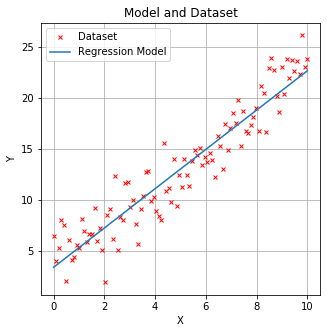

In [0]:
# plot graphs

import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.title('Model and Dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()

plt.plot(x, y, 'ro', label='Dataset', marker='x', markersize=4)
plt.plot(x, model.model.weight.item() * x + model.model.bias.item(), label='Regression Model')
plt.legend()
plt.show()

# **Data Augmentation**

Now let’s take a closer look at that `transforms.Compose(...)` function and see what it does. We will use a randomly generated image to demonstrate its use. Let's generate an image:

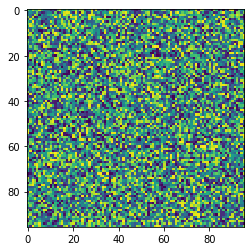

In [0]:
import torchvision.transforms as transforms

image = transforms.ToPILImage(mode='L')(torch.randn(1, 96, 96))
plt.imshow(image)

Okay, we have our image sample, so now let’s apply some dummy transformation to it. We are going to rotate the image by 45 degrees. The transformation below takes care of that:

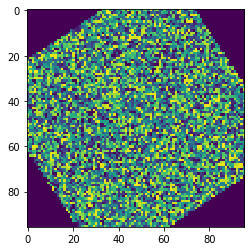

In [0]:
## dummy transformation
dummy_transform = transforms.Compose(
    [transforms.RandomRotation(45)])

dummy_result = dummy_transform(image)

plt.imshow(dummy_result)

Notice you can put any transformations within `transforms.Compose(...)`. You can use the built-in transformations offered by PyTorch or you can build your own and compose transformations as you wish. Let's try another composition of transformations: rotate + vertical flip.

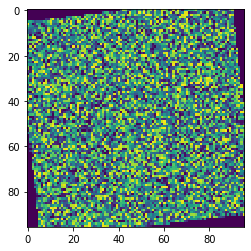

In [0]:
## dummy transform 
dummy2_transform = transforms.Compose(
    [transforms.RandomRotation(45), transforms.RandomVerticalFlip()])

dummy2_result = dummy2_transform(image)

plt.imshow(dummy2_result)